In [1]:
# Bibliotheken abrufen
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# URL als Variable definieren
url = "https://rodare.hzdr.de/api/records/?page=1&sort=mostrecent&size=1000"

In [3]:
# Funktion um Inhalt aus URL in r zu speichern
r = requests.get(url)

In [4]:
# JSON lesen lassen
json = r.json()

In [5]:
# Dictionary anlegen und Keys der gewünschten Werte definieren
Meta_dict = {}
Meta_dict['type'] = []
Meta_dict['license'] = []
Meta_dict['related_identifier'] = []
Meta_dict['publication_date'] = []
Meta_dict['Access_Right'] = []
Meta_dict['Downloads'] = []
Meta_dict['unique_downloads'] = []
Meta_dict['unique_views'] = []
Meta_dict['views'] = []

In [6]:
# Definition einer Teilliste und for-Schleife, um den type der Records aus allen Einträgen auszulesen und aufzulisten
for record in json['hits']['hits']:
    Meta_dict['type'].append(record['metadata']['resource_type']['type'])
    if 'license' in record['metadata'].keys():
        Meta_dict['license'].append(record['metadata']['license']['id'])
    else:
        Meta_dict['license'].append('NaN')
# Neue Iteration in Liste der related identifier anlegen und dort die Bedigungen für das Auslesen definieren
    count_id = 0
    for identifier in record['metadata']['related_identifiers']:
        if identifier['relation'] == 'isReferencedBy' and 'hzdr' in identifier['identifier']:
            count_id = count_id + 1
    Meta_dict['related_identifier'].append(count_id)
    Meta_dict['publication_date'].append(record['metadata']['publication_date'])
    Meta_dict['Access_Right'].append(record['metadata']['access_right'])
    Meta_dict['Downloads'].append(int(record['stats']['downloads']))
    Meta_dict['unique_downloads'].append(int(record['stats']['unique_downloads']))
    Meta_dict['unique_views'].append(int(record['stats']['unique_views']))
    Meta_dict['views'].append(int(record['stats']['views']))

In [7]:
# Umwandlung der Liste in ein DataFrame 
df = pd.DataFrame(Meta_dict)

In [8]:
df

,type,license,related_identifier,publication_date,Access_Right,Downloads,unique_downloads,unique_views,views
0,dataset,CC-BY-4.0,0,2021-08-02,open,3,1,7,9
1,dataset,CC-BY-4.0,1,2021-07-31,open,5,5,2,2
2,dataset,CC-BY-4.0,1,2021-07-30,open,0,0,10,18
3,software,LGPL-3.0,0,2021-07-30,open,0,0,14,24
4,dataset,NaN,0,2021-07-21,closed,0,0,11,11
...,...,...,...,...,...,...,...,...,...
258,dataset,CC-BY-SA-4.0,0,2018-05-09,open,22,21,337,399
259,dataset,CC-BY-4.0,0,2018-04-25,open,90,33,345,419
260,dataset,CC-BY-4.0,0,2018-04-12,open,23,18,285,342
261,dataset,NaN,0,2018-03-20,restricted,0,0,249,278


In [9]:
print(df['Downloads'].sum())

17955


In [10]:
df.describe(include='all')

,type,license,related_identifier,publication_date,Access_Right,Downloads,unique_downloads,unique_views,views
count,263,263,263.000000,263,263,263.000000,263.000000,263.000000,263.000000
unique,6,10,NaN,185,4,NaN,NaN,NaN,NaN
top,dataset,CC-BY-4.0,NaN,2021-03-10,open,NaN,NaN,NaN,NaN
freq,201,120,NaN,17,148,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.612167,NaN,NaN,68.269962,24.479087,95.768061,139.380228
std,NaN,NaN,0.495942,NaN,NaN,228.931169,64.499294,100.830953,127.355965
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,2.000000,2.000000
25%,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,40.500000,65.000000
50%,NaN,NaN,1.000000,NaN,NaN,6.000000,4.000000,67.000000,105.000000
75%,NaN,NaN,1.000000,NaN,NaN,39.000000,20.000000,98.500000,158.500000


In [11]:
df.shape

(263, 9)

In [12]:
df.dtypes

type                  object
license               object
related_identifier     int64
publication_date      object
Access_Right          object
Downloads              int64
unique_downloads       int64
unique_views           int64
views                  int64
dtype: object

In [13]:
df.columns

Index(['type', 'license', 'related_identifier', 'publication_date',
       'Access_Right', 'Downloads', 'unique_downloads', 'unique_views',
       'views'],
      dtype='object')

In [14]:
len(df)

263

In [15]:
df['type'].value_counts()

dataset         201
software         24
image            14
other            13
video             6
presentation      5
Name: type, dtype: int64

In [16]:
df['type'].value_counts(normalize=True)

dataset         0.764259
software        0.091255
image           0.053232
other           0.049430
video           0.022814
presentation    0.019011
Name: type, dtype: float64

In [17]:
type_mode = df['type'].mode()
type_mode[0]

'dataset'

In [18]:
df['related_identifier'].isna().sum()

0

In [19]:
df['Downloads'].mean()

68.26996197718631

In [20]:
df['Downloads'].median()

6.0

In [21]:
df['Downloads'].var()

52409.480277479444

In [22]:
df['Downloads'].std()

228.9311693009046

In [23]:
df['Downloads'].max()

2072

In [24]:
df['Downloads'].min()

0

In [25]:
df['Downloads'].corr(df['views'])

0.4520000601455801

In [26]:
df['views'].mean()

139.38022813688212

In [27]:
df['views'].median()

105.0

In [28]:
# Nur den Mittelwert etc. eines bestimmten Zetabschnittes errechnen lassen?
# Wie eine Printausgabe in eine Datei schreiben lassen bei Ausführung des Programmes?

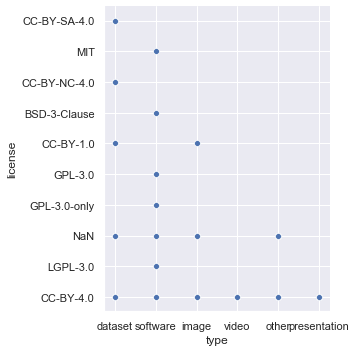

In [30]:
sns.relplot(x='type', y='license', data=df)

In [ ]:
#plt.savefig('../type_license.png', dpi=150)

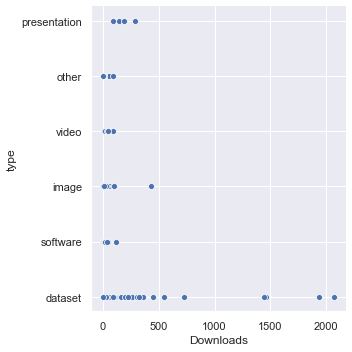

In [34]:
sns.relplot(y='type', x='Downloads', data=df)

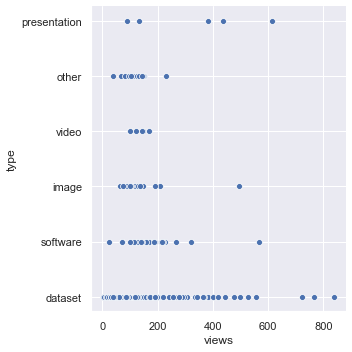

In [35]:
sns.relplot(y='type', x='views', data=df)

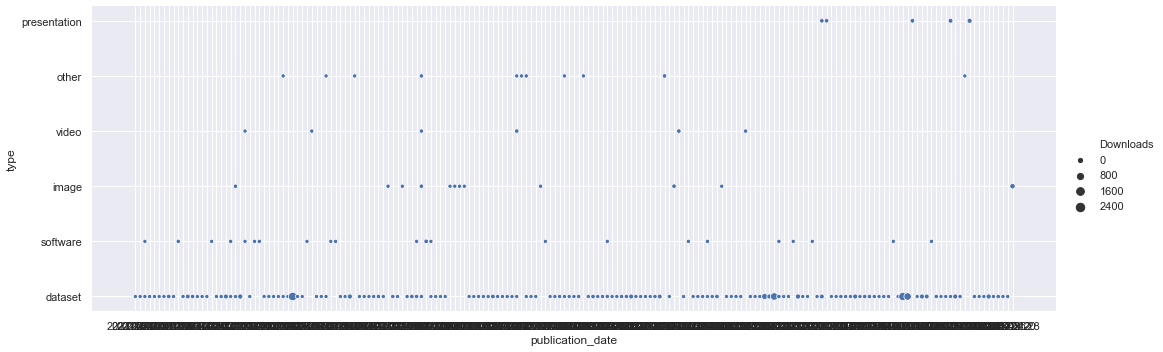

In [45]:
#Problem: Wie kann ich hier nur bestimmte Daten zb 2021 in die Darstellung einbringen?
sns.relplot(x='publication_date', y='type', 
            size='Downloads',
            #row='license', 
            #col='license', 
            data=df,
            height=5, aspect=3)

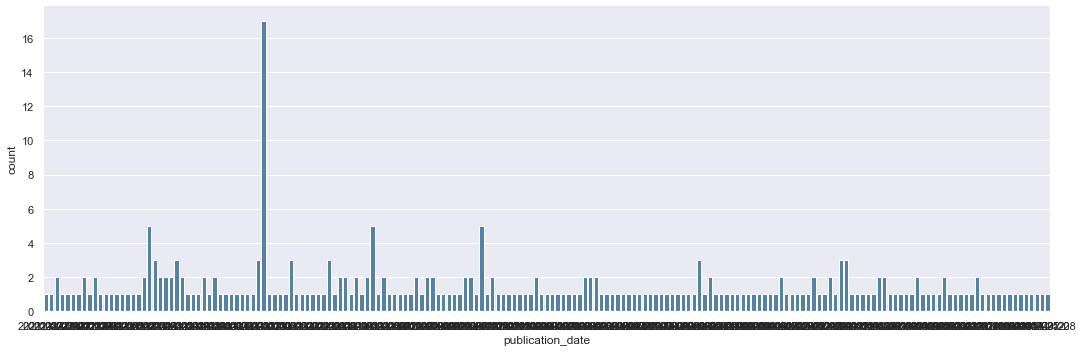

In [48]:
sns.catplot(x='publication_date',
            data=df, kind='count', color="steelblue", height=5, aspect=3)

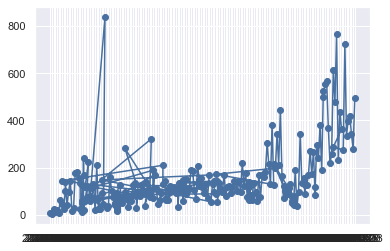

In [52]:
plt.plot(df['publication_date'], df['views'], color='#4870a0', marker='o')

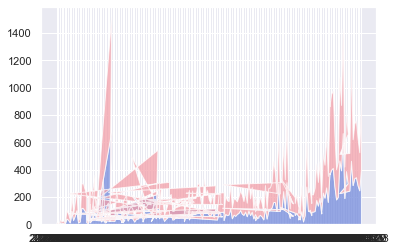

In [62]:
plt.stackplot(df['publication_date'], 
              df['unique_views'], 
              df['views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
              labels=['unique_views', 'views'])